In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [4]:
X, y = make_classification(n_samples = 15000, n_features = 2, n_informative = 2,
                          n_redundant = 0, n_repeated = 0, n_classes = 2,
                          n_clusters_per_class = 1, weights = [0.95, 0.05],
                          class_sep=0.8, random_state = 0)

In [5]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['target'] = y
df.head()

,x1,x2,target
0,-2.473300,0.569620,0
1,1.647105,0.651006,0
2,-1.380968,1.003418,0
3,-2.592531,0.588387,0
4,-1.507043,0.647997,0


In [6]:
df.shape

(15000, 3)

In [7]:
df['target'].value_counts()

0    14183
1      817
Name: target, dtype: int64

In [8]:
df['target'].value_counts() / df.shape[0]

0    0.945533
1    0.054467
Name: target, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15000 non-null  float64
 1   x2      15000 non-null  float64
 2   target  15000 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 293.1 KB


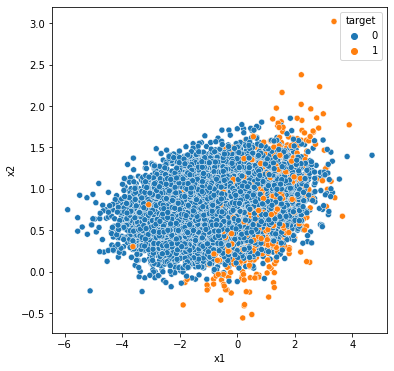

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='target')
plt.show()

In [12]:
from mpl_toolkits.mplot3d import Axes3D

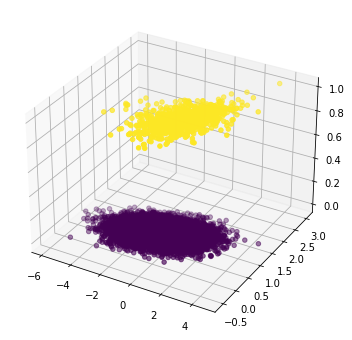

In [13]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['target'], c=df['target'])
plt.show()

## Cách 1: sử dụng ClusterCentroids

In [16]:
from imblearn.under_sampling import ClusterCentroids

In [17]:
# khởi tạo 
rs = ClusterCentroids()

In [18]:
# cân bằng dữ liệu
X_resample, y_resample = rs.fit_resample(X, y)

In [20]:
# chuyển thành DataFrame
df_resample = pd.DataFrame(X_resample, columns = ['x1','x2'])
df_resample['target'] = y_resample
df_resample.head()

,x1,x2,target
0,1.116222,1.448506,0
1,-1.256507,0.747687,0
2,-2.318340,0.885628,0
3,-0.056043,0.800665,0
4,-2.966996,0.124907,0


In [21]:
df_resample['target'].value_counts()

1    817
0    817
Name: target, dtype: int64

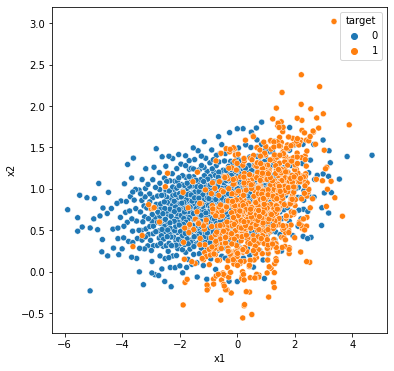

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_resample, x='x1', y='x2', hue='target')
plt.show()

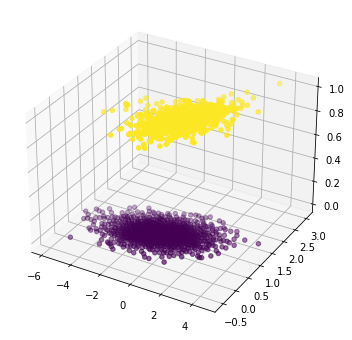

In [23]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_resample['x1'], df_resample['x2'], df_resample['target'], c=df_resample['target'])
plt.show()

## Cách 2: sử dụng RandomUnderSampler

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
# khởi tạo
rs2 = RandomUnderSampler()

In [26]:
# cân bằng dữ liệu
X_resample2, y_resample2 = rs2.fit_resample(X, y)

In [27]:
df_resample2 = pd.DataFrame(X_resample2, columns = ['x1', 'x2'])
df_resample2['target'] = y_resample2
df_resample2.head()

,x1,x2,target
0,0.640765,0.877016,0
1,-1.152722,1.031161,0
2,-2.093078,0.853708,0
3,-2.391722,1.104493,0
4,-1.135007,1.376351,0


In [28]:
df_resample2['target'].value_counts()

1    817
0    817
Name: target, dtype: int64

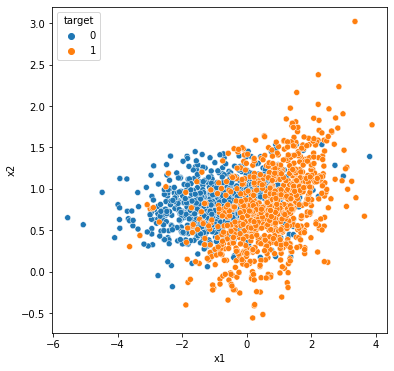

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_resample2, x='x1', y='x2', hue='target')
plt.show()

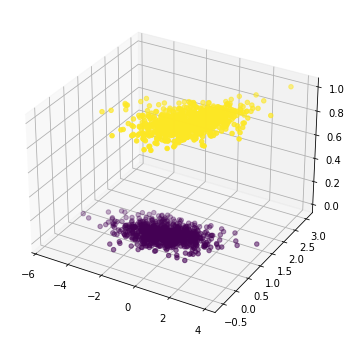

In [30]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_resample2['x1'], df_resample2['x2'], df_resample2['target'], c=df_resample2['target'])
plt.show()

## Cách 3: sử dụng resample

In [31]:
from sklearn.utils import resample

In [32]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

In [33]:
df_0.shape, df_1.shape

((14183, 3), (817, 3))

In [34]:
df_0_resample = resample(df_0, replace = False, n_samples = df_1.shape[0], random_state = 0)

In [35]:
df_0_resample.shape

(817, 3)

In [36]:
df_resample3 = pd.concat([df_0_resample, df_1])

In [37]:
df_resample3['target'].value_counts()

1    817
0    817
Name: target, dtype: int64

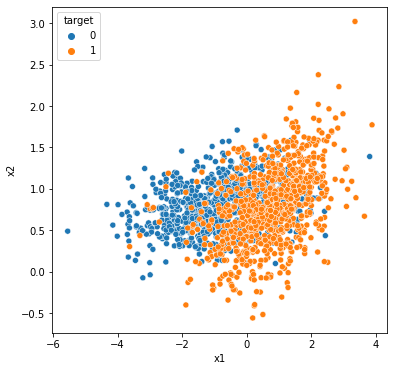

In [38]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_resample3, x='x1', y='x2', hue='target')
plt.show()

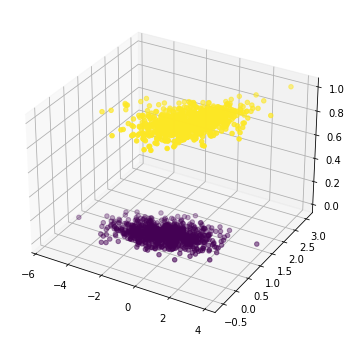

In [39]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_resample3['x1'], df_resample3['x2'], df_resample3['target'], c=df_resample3['target'])
plt.show()

## cân bằng với tỉ lệ 55 - 45

In [40]:
df.shape

(15000, 3)

In [42]:
df.shape[0] * 0.55, df.shape[0] * 0.45

(8250.0, 6750.0)

In [43]:
df['target'].value_counts()

0    14183
1      817
Name: target, dtype: int64

### dùng ClusterCentroids

In [46]:
rs4 = ClusterCentroids(sampling_strategy={0: 900, 1: 817})

In [47]:
X_rs4, y_rs4 = rs4.fit_resample(X, y)

In [48]:
df_resample4 = pd.DataFrame(X_rs4, columns = ['x1', 'x2'])
df_resample4['target'] = y_rs4
df_resample4.head()

,x1,x2,target
0,0.117457,0.537317,0
1,-1.404867,0.426485,0
2,-3.173937,0.514873,0
3,1.510345,1.041091,0
4,-1.149042,0.882316,0


In [49]:
df_resample4['target'].value_counts()

0    900
1    817
Name: target, dtype: int64

### dùng RandomUnderSampler

In [50]:
rs5 = RandomUnderSampler(sampling_strategy={0: 900, 1: 817})